In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rnd = np.random
rnd.seed(4)

In [3]:
n = 10
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100

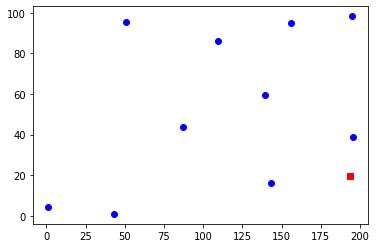

In [4]:
plt.plot(xc[0],yc[0],c='r',marker='s')
plt.scatter(xc[1:],yc[1:],c='b')

In [5]:
N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j): np.hypot(xc[i]-xc[j],yc[i]-yc[j]) for i,j in A}
Q = 20
q = {i: rnd.randint(1,10) for i in N}

In [6]:
from gurobipy import Model, GRB, quicksum

In [7]:
mdl =Model('CVRP')

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-28


In [8]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [9]:
mdl.modelSense = GRB.MINIMIZE
mdl.setObjective(quicksum(x[i,j]*c[i,j] for i,j in A ))

In [10]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)==1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if i!=j)==1 for j in N);
mdl.addConstrs((x[i,j]==1) >> (u[i]+q[i]==u[j]) for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i]>=q[i] for i in N);
mdl.addConstrs(u[i]<=Q for i in N);

In [11]:
mdl.Params.MipGap = 0.1
mdl.Params.Timelimite = 30 # seconds
mdl.optimize()

Set parameter MIPGap to value 0.1
No parameters matching 'Timelimite' found
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 40 rows, 120 columns and 220 nonzeros
Model fingerprint: 0x754c04c9
Model has 90 general constraints
Variable types: 10 continuous, 110 integer (110 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
  GenCon rhs range [1e+00, 9e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 162 rows and 4 columns
Presolve time: 0.07s
Presolved: 202 rows, 124 columns, 1265 nonzeros
Variable types: 34 continuous, 90 integer (90 binary)
Found heuristic solution: objective 1522.5235964

Root relaxation: objective 5.585816e+02, 71 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |

In [12]:
active_arcs = [a for a in A if x[a].x>0.99]

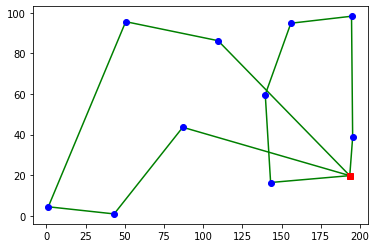

In [13]:
plt.plot(xc[0],yc[0],c='r',marker='s')
plt.scatter(xc[1:],yc[1:],c='b')
for i,j in active_arcs:
    plt.plot([xc[i],xc[j]],[yc[i],yc[j]],c='g',zorder=0)